# Clustering 

In [ ]:
#@title Load scanorama batch corrected data

adata = sc.read_h5ad("/content/drive/MyDrive/scRNA_using_Python/Objects/sc_QCNFSDM_scanorama_corrected_covid.h5ad")

adata

AnnData object with n_obs × n_vars = 9000 × 2000
    obs: 'type', 'sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'sample_colors', 'tsne', 'type_colors', 'umap'
    obsm: 'Scanorama', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'connectivities', 'distances'

### Graph clustering


The procedure of clustering on a Graph can be generalized as 3 main steps:

1) Build a kNN graph from the data

2) Prune spurious connections from kNN graph (optional step). This is a SNN graph.

3) Find groups of cells that maximizes the connections within the group compared other groups.

#### Leiden 

In [ ]:
sc.tl.leiden(adata, key_added = "leiden_1.0") # default resolution in 1.0
sc.tl.leiden(adata, resolution = 0.6, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution = 0.4, key_added = "leiden_0.4")
sc.tl.leiden(adata, resolution = 1.4, key_added = "leiden_1.4")

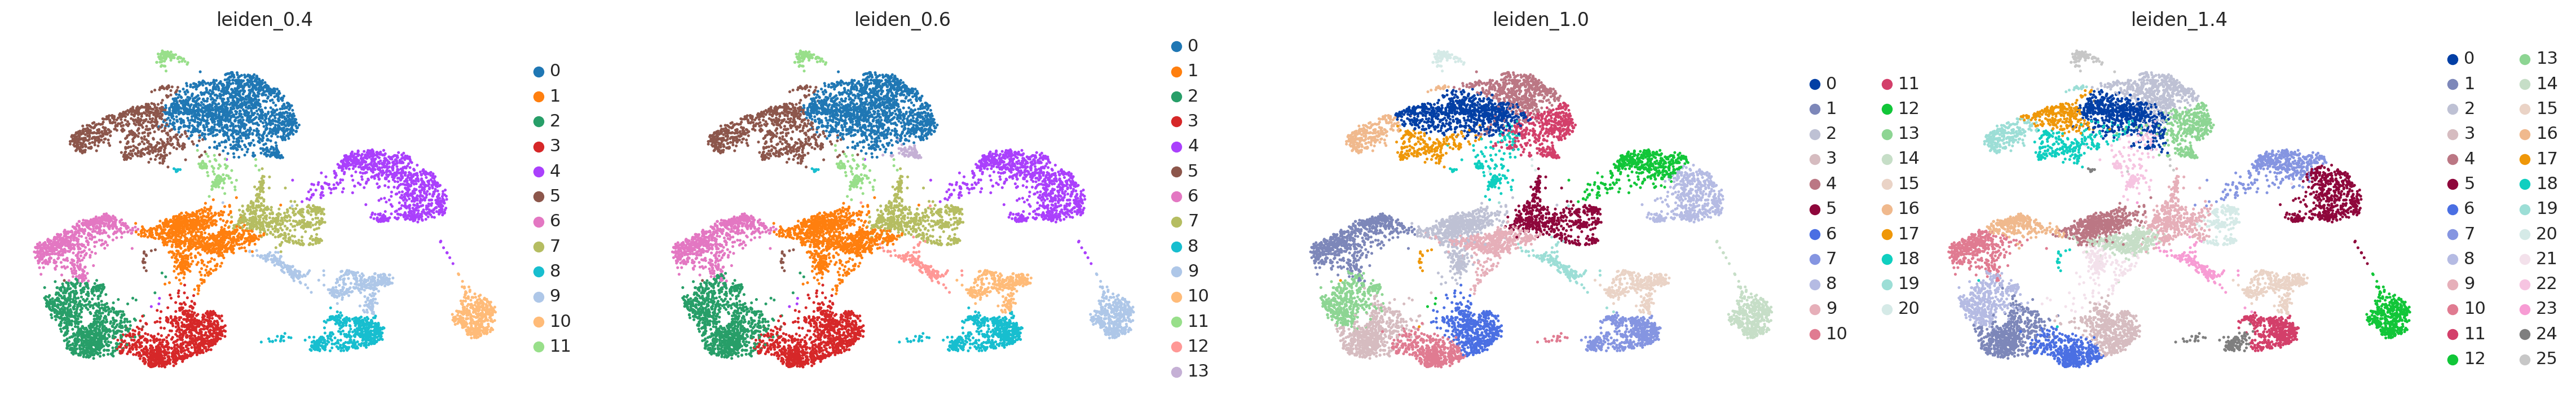

In [ ]:
sc.pl.umap(adata, color=['leiden_0.4', 'leiden_0.6', 'leiden_1.0','leiden_1.4'])

Once we have done clustering, the relationships between clusters can be calculated as correlation in PCA space and we also visualize some of the marker genes that we used in the Dim Reduction lab onto the clusters

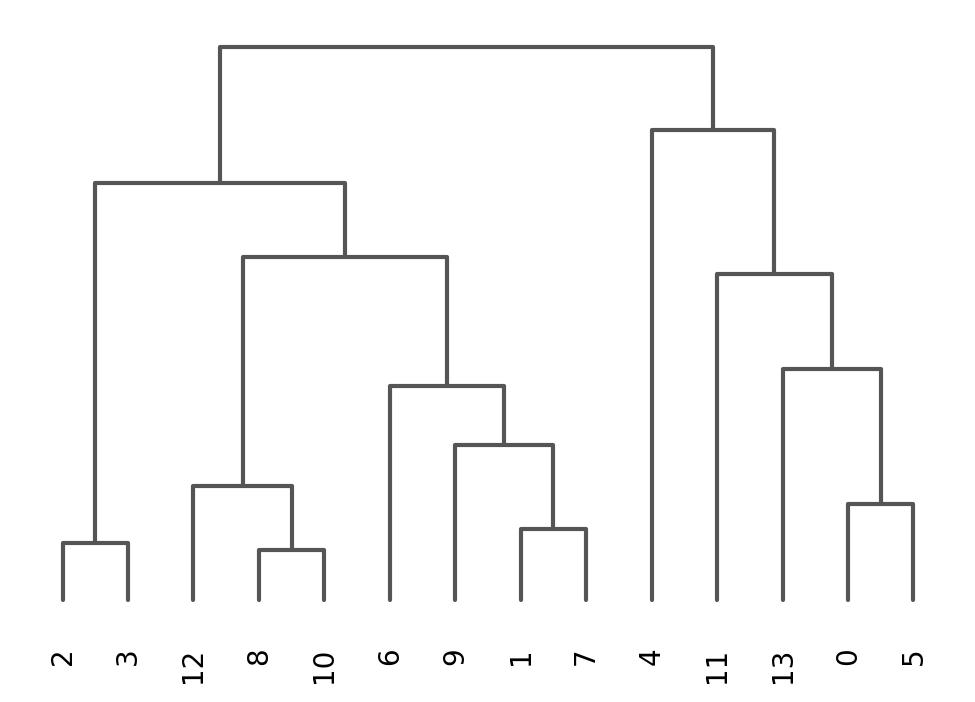

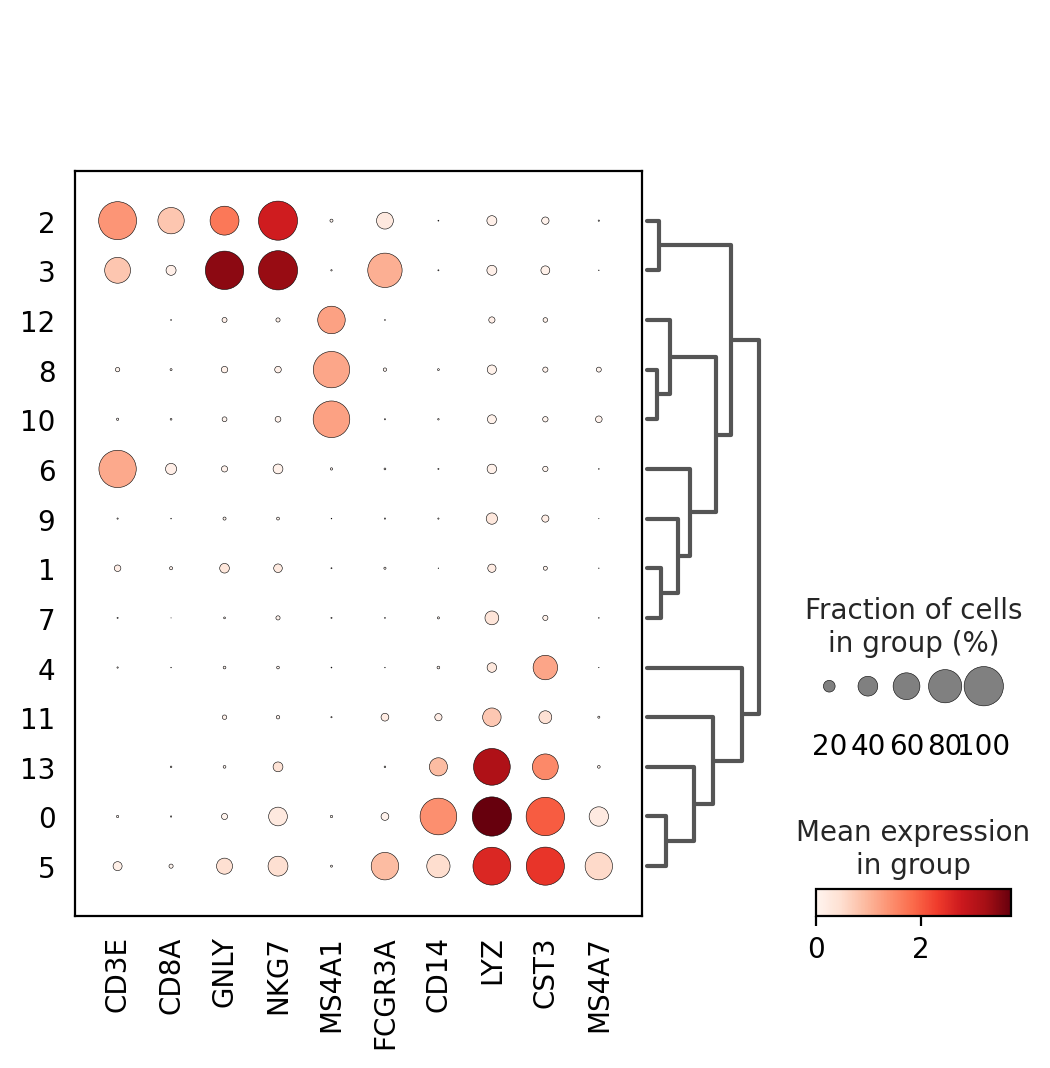

In [ ]:
sc.tl.dendrogram(adata, groupby = "leiden_0.6")
sc.pl.dendrogram(adata, groupby = "leiden_0.6")

genes  = ["CD3E", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7"]
sc.pl.dotplot(adata, genes, groupby='leiden_0.6', dendrogram=True)

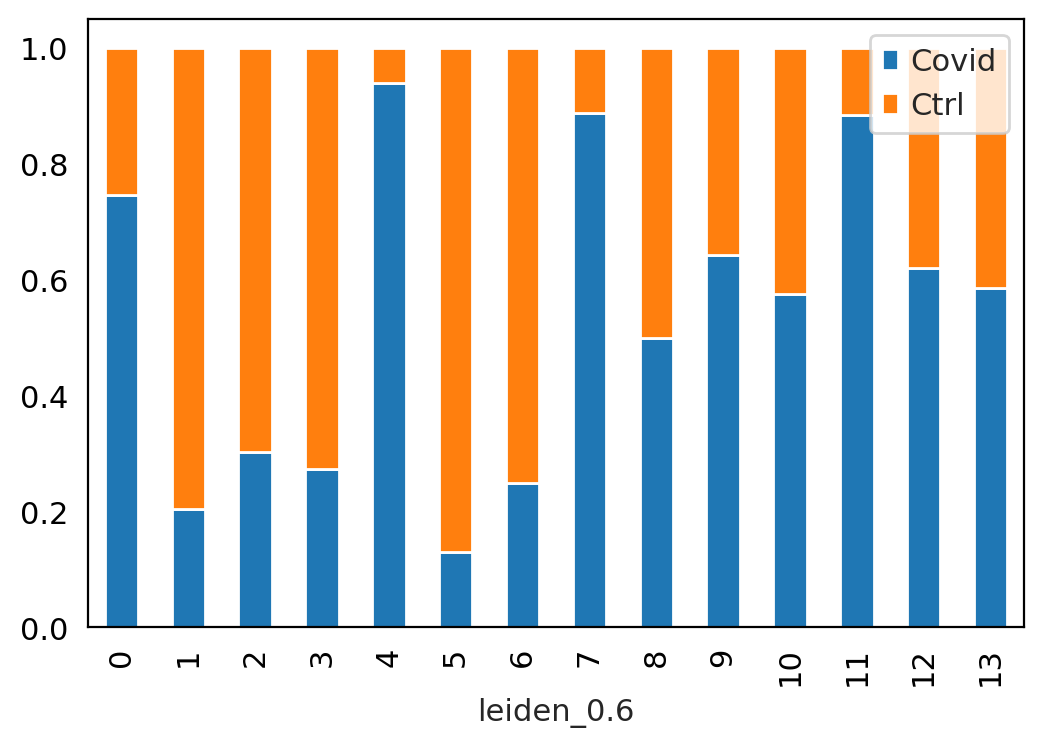

In [ ]:
#@title Proportion of cells per condition 

tmp = pd.crosstab(adata.obs['leiden_0.6'],adata.obs['type'], normalize='index')
tmp.plot.bar(stacked=True).legend(loc='upper right')

#### Louvain

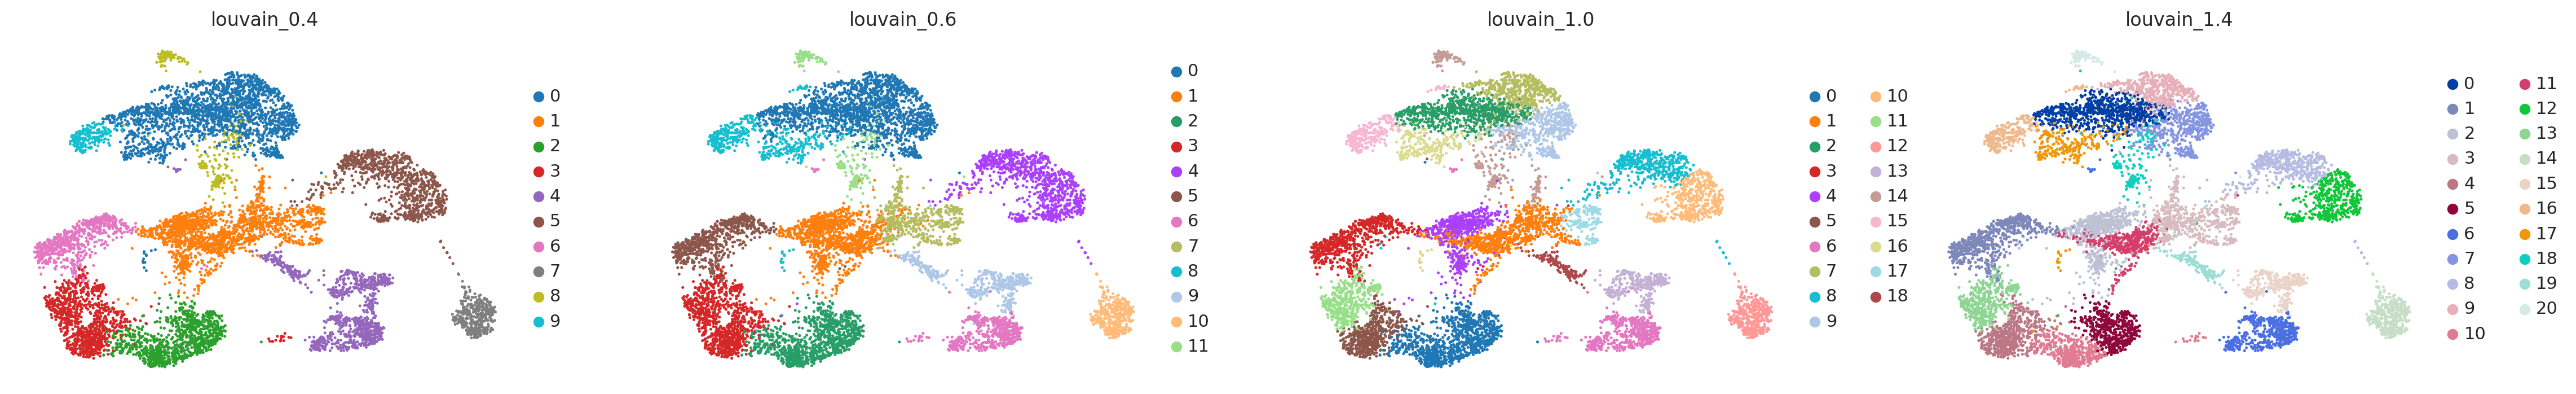

In [ ]:
sc.tl.louvain(adata, key_added = "louvain_1.0") # default resolution in 1.0
sc.tl.louvain(adata, resolution = 0.6, key_added = "louvain_0.6")
sc.tl.louvain(adata, resolution = 0.4, key_added = "louvain_0.4")
sc.tl.louvain(adata, resolution = 1.4, key_added = "louvain_1.4")

sc.pl.umap(adata, color=['louvain_0.4', 'louvain_0.6', 'louvain_1.0','louvain_1.4'])

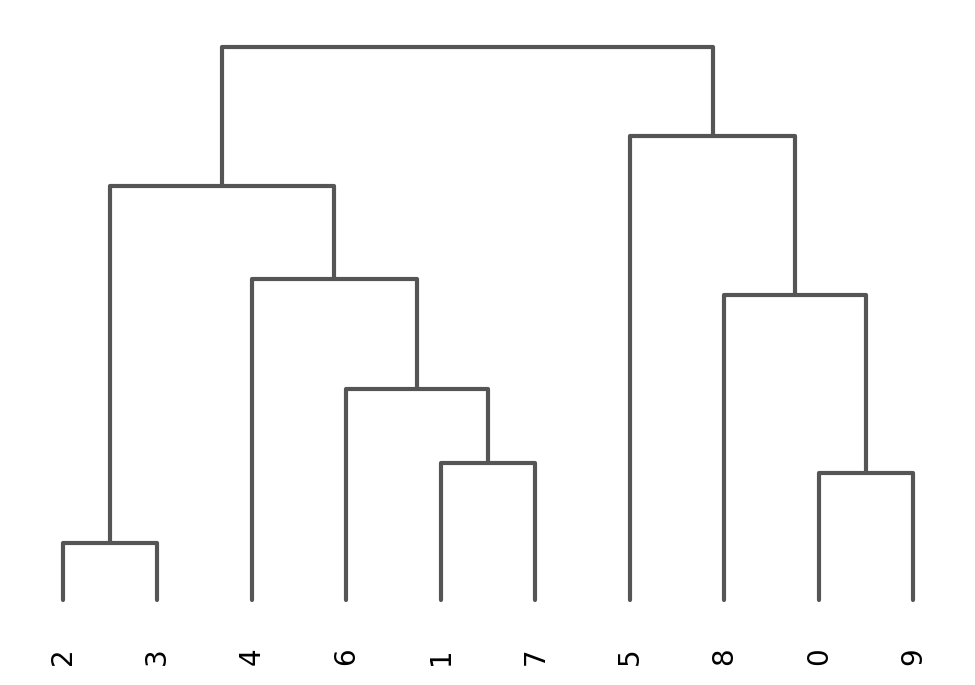

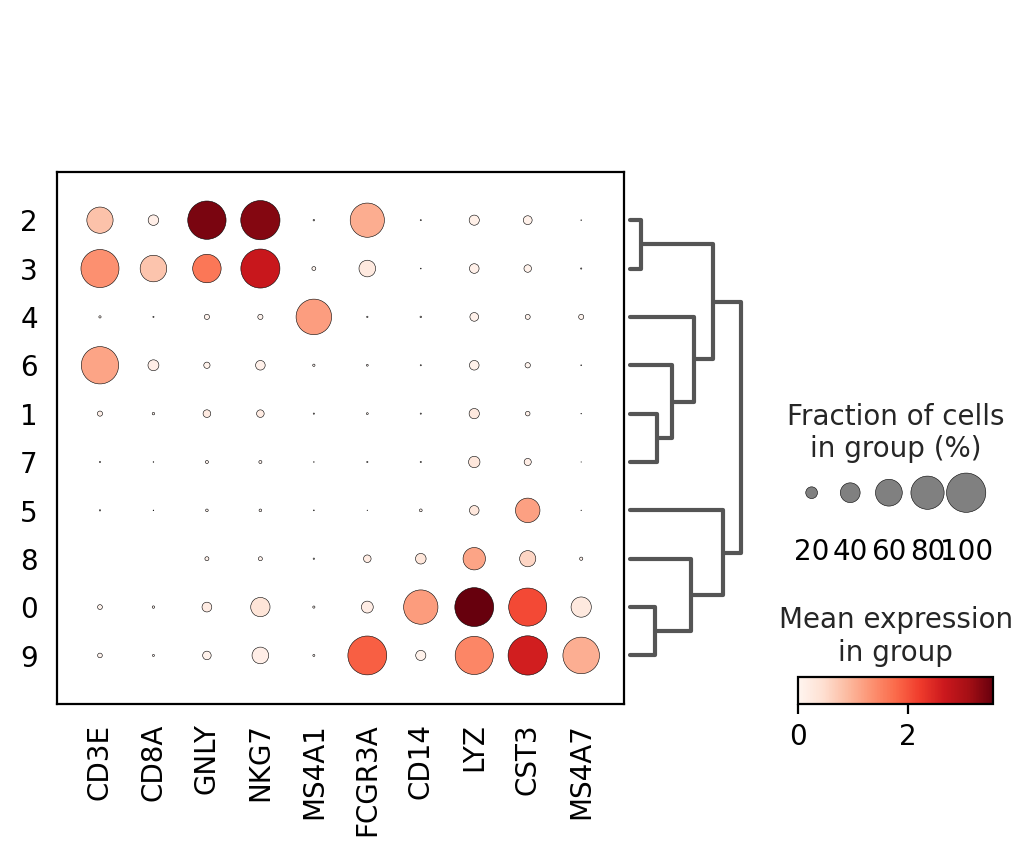

In [ ]:
sc.tl.dendrogram(adata, groupby = "louvain_0.4")
sc.pl.dendrogram(adata, groupby = "louvain_0.4")

genes  = ["CD3E", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7"]

sc.pl.dotplot(adata, genes, groupby='louvain_0.4', dendrogram=True)

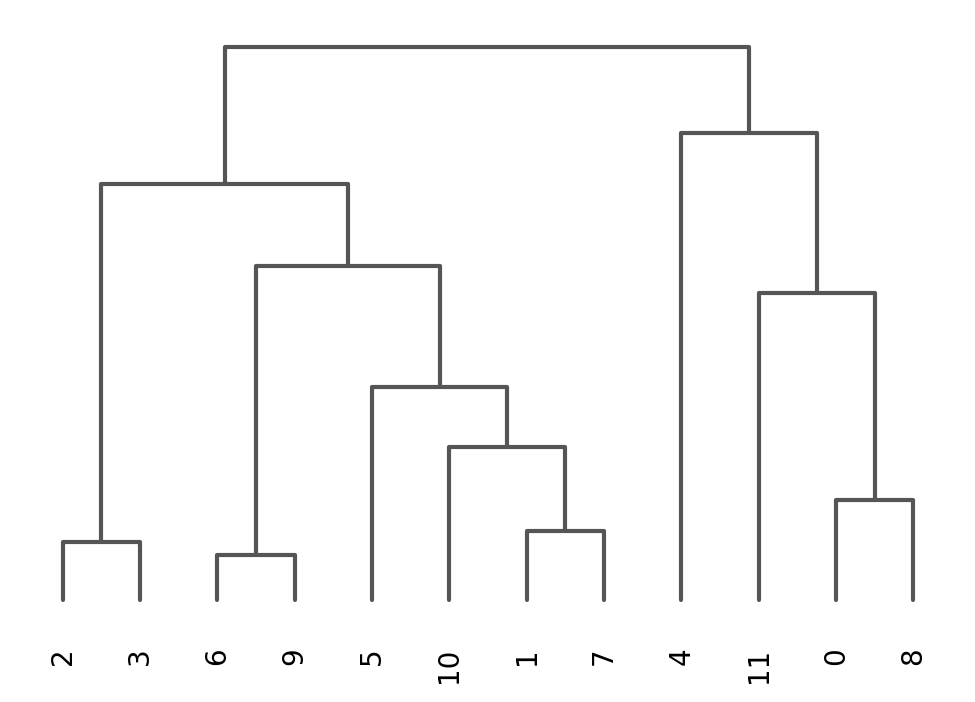

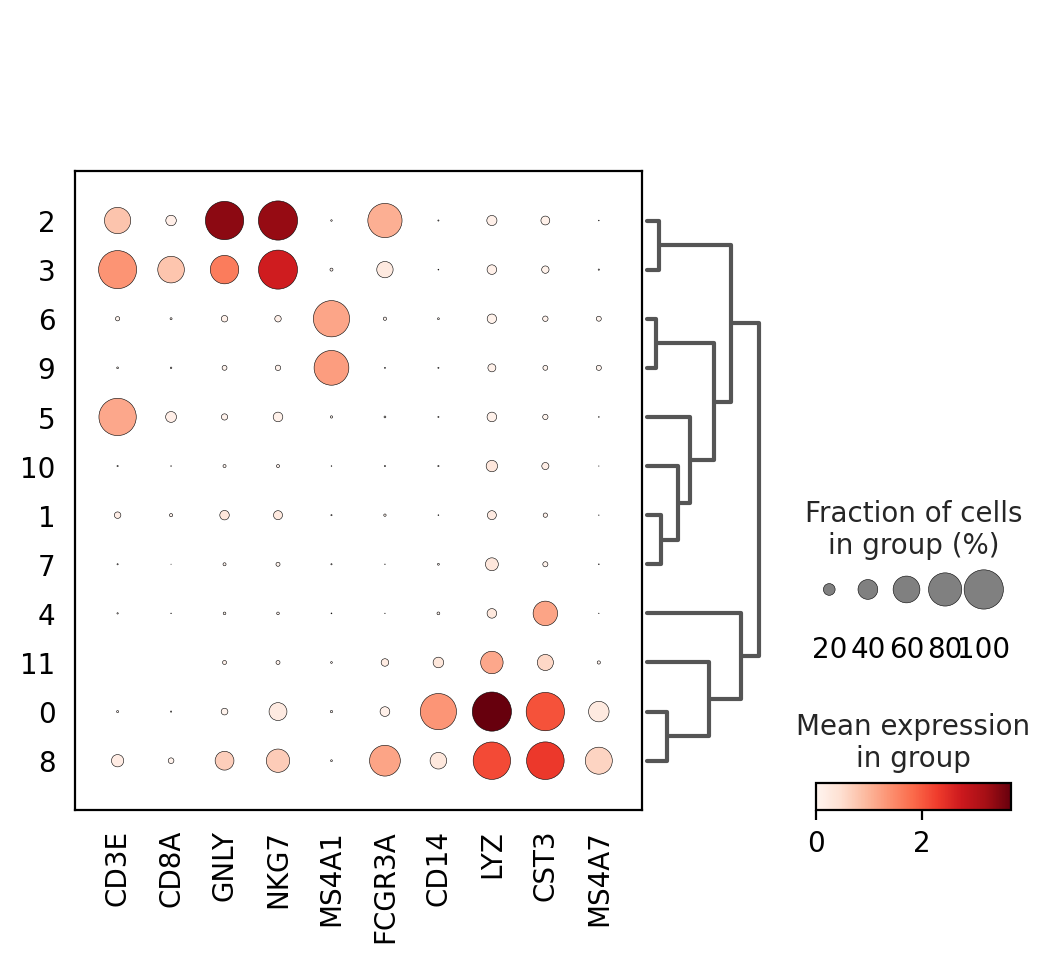

In [ ]:
sc.tl.dendrogram(adata, groupby = "louvain_0.6")
sc.pl.dendrogram(adata, groupby = "louvain_0.6")

genes  = ["CD3E", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7"]

sc.pl.dotplot(adata, genes, groupby='louvain_0.6', dendrogram=True)

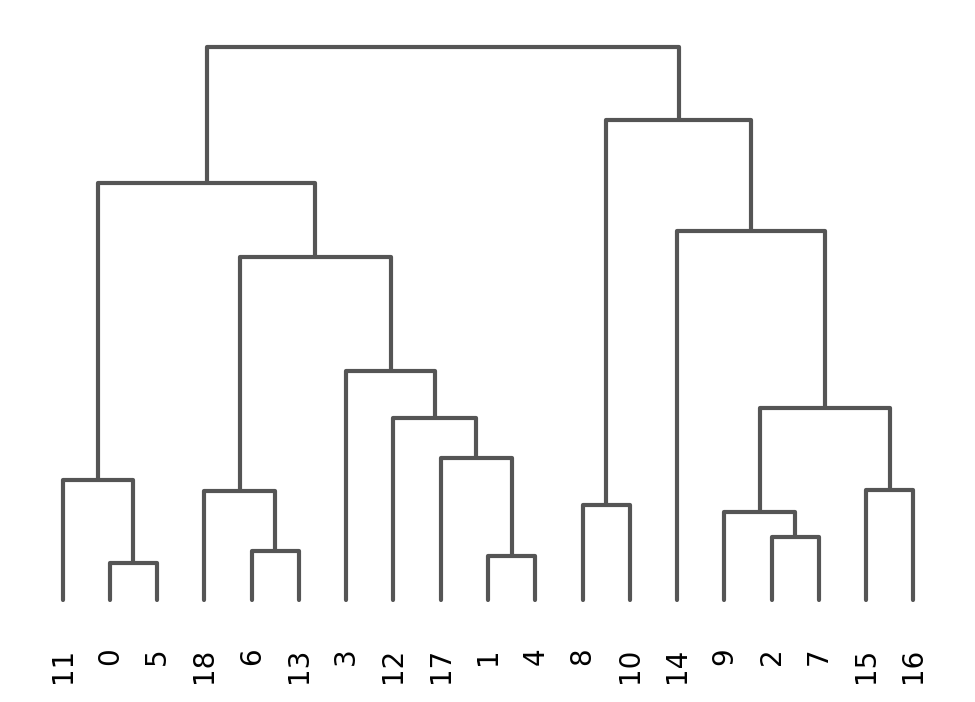

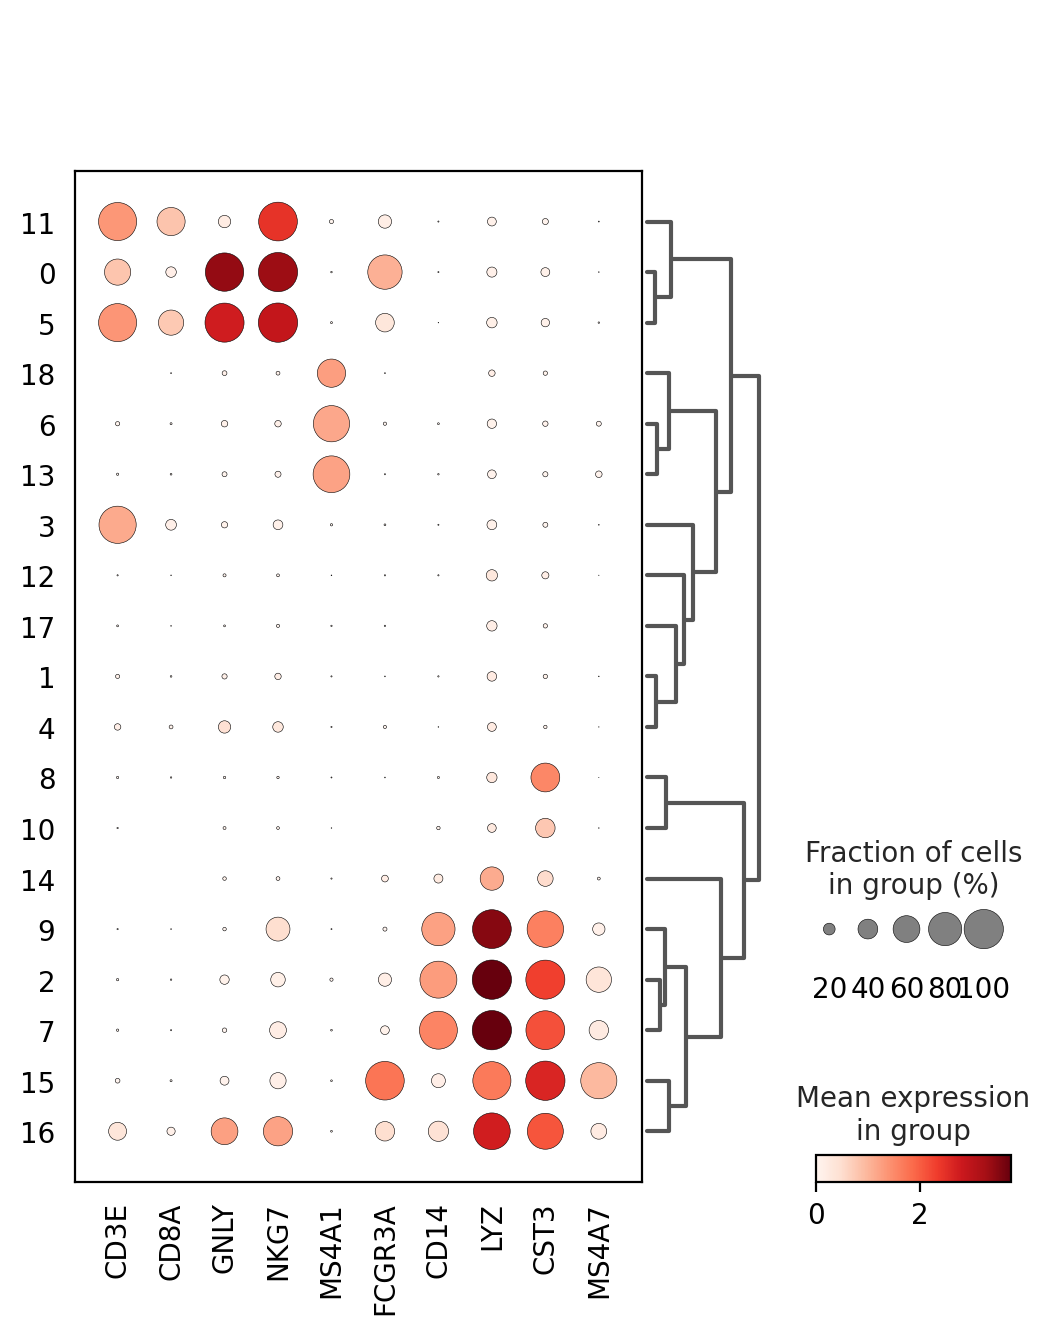

In [ ]:
sc.tl.dendrogram(adata, groupby = "louvain_1.0")
sc.pl.dendrogram(adata, groupby = "louvain_1.0")

genes  = ["CD3E", "CD8A", "GNLY","NKG7", "MS4A1","FCGR3A","CD14","LYZ","CST3","MS4A7"]

sc.pl.dotplot(adata, genes, groupby='louvain_1.0', dendrogram=True)

### K-Mean clustering

K-means is a generic clustering algorithm that has been used in many application areas. In R, it can be applied via the kmeans function. Typically, it is applied to a reduced dimension representation of the expression data (most often PCA, because of the interpretability of the low-dimensional distances). We need to define the number of clusters in advance. Since the results depend on the initialization of the cluster centers, it is typically recommended to run K-means with multiple starting configurations (via the nstart argument)

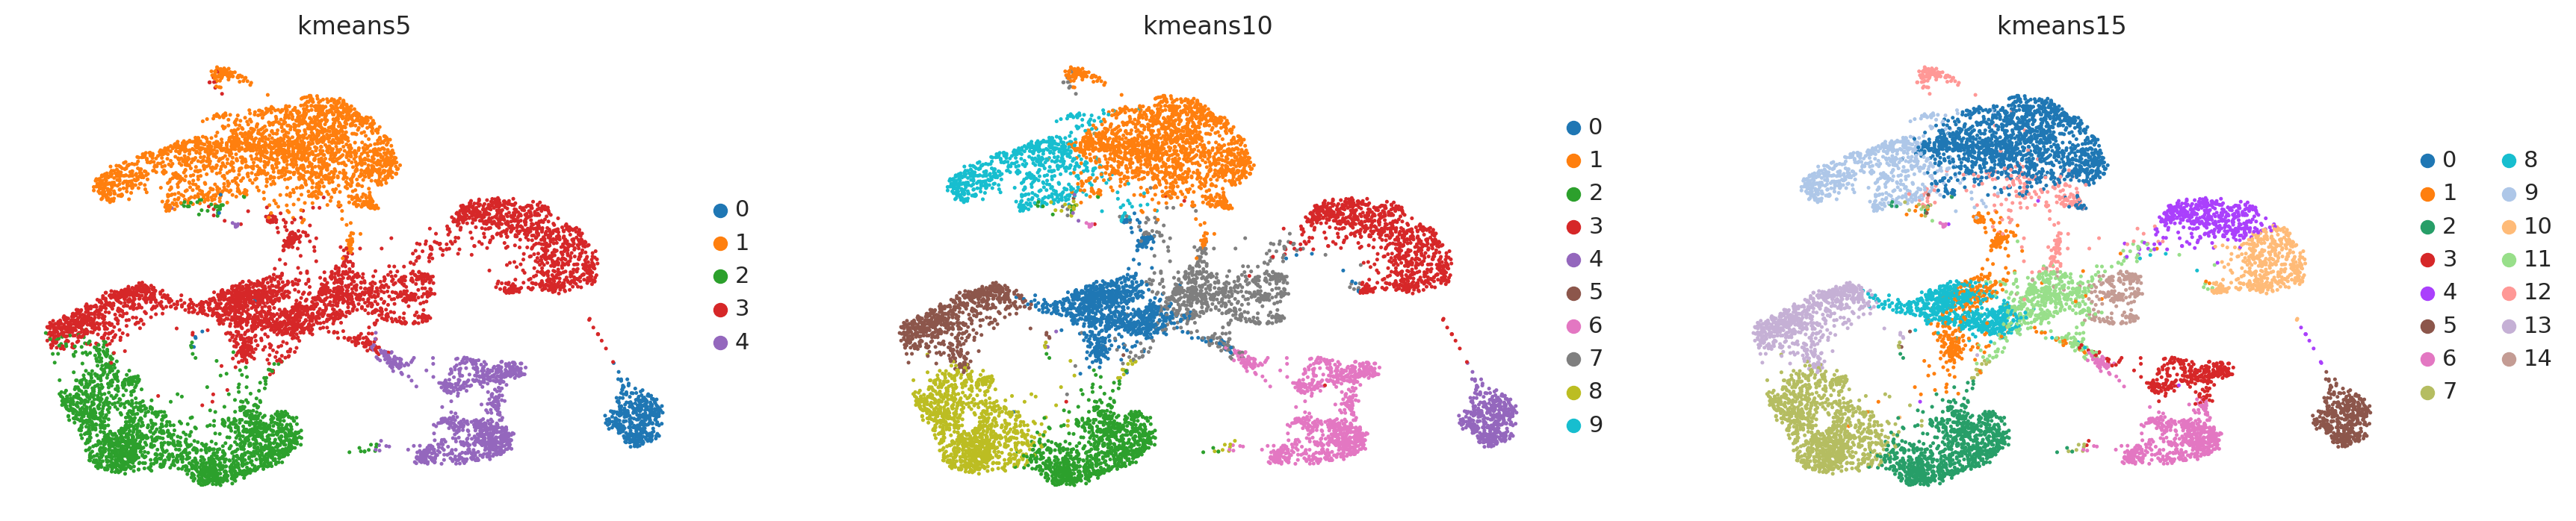

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# extract pca coordinates
X_pca = adata.obsm['Scanorama'] 

# kmeans with k=5
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca) 
adata.obs['kmeans5'] = kmeans.labels_.astype(str)

# kmeans with k=10
kmeans = KMeans(n_clusters=10, random_state=0).fit(X_pca) 
adata.obs['kmeans10'] = kmeans.labels_.astype(str)

# kmeans with k=15
kmeans = KMeans(n_clusters=15, random_state=0).fit(X_pca) 
adata.obs['kmeans15'] = kmeans.labels_.astype(str)

sc.pl.umap(adata, color=['kmeans5', 'kmeans10', 'kmeans15'])

In [ ]:
#@title save clustered integrated data to file
save_file = 'Objects/sc_QCNFSDM_scCorrected__clustered_covid.h5ad'
adata.write_h5ad(save_file)